In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Datasets/country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


1. Extract Features<br>
a. Features should not have null values<br>
b. Features should be numeric in nature<br>
c. Features should be of the type array/ dataframe<br>
d. Features should have some rows and some columns<br>
e. Features should be on the same scale<br>
2. Train the model on the entire dataset<br>

In [4]:
X = df

In [6]:
X.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
X=X.drop("country",axis=1)

In [8]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
X.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [10]:
X.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
X.shape

(167, 9)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()

In [15]:
X=scaler.fit_transform(X)

## 2

In [16]:
from sklearn.cluster import KMeans

In [17]:
spread=[]
for clusterNumber in [2,3,4,5,6,7,8,9,10]:
    model=KMeans(n_clusters=clusterNumber)
    model.fit(X)
    spread.append(model.inertia_)

In [18]:
import matplotlib.pyplot as plt

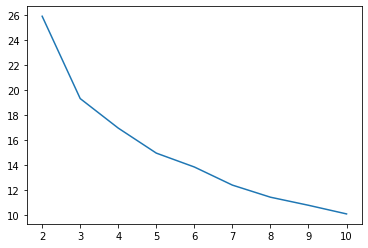

In [19]:
plt.plot([2,3,4,5,6,7,8,9,10],spread)
plt.show()

In [20]:
model=KMeans(n_clusters=7)
model.fit(X)

KMeans(n_clusters=7)

In [21]:
predictions=model.predict(X)

In [22]:
predictions=pd.DataFrame(predictions)

In [23]:
predictions.columns=["ClusterId"]

In [24]:
predictions

,ClusterId
0,6
1,2
2,3
3,6
4,2
...,...
162,1
163,3
164,2
165,1


In [25]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [26]:
data=pd.concat([predictions,df],axis=1)

In [27]:
data

,ClusterId,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,6,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,6,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,1,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,3,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,2,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
1. Subset your column of interest
2. Convert it to boolean based on condition
3. surround it with variablename[..code uptil step 2]

In [28]:
data[data["ClusterId"]==0]["country"].values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)

In [29]:
data[data["ClusterId"]==1]["country"].values

array(['Botswana', 'Comoros', 'Congo, Rep.', 'Eritrea', 'Gabon', 'Gambia',
       'Ghana', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Mauritania', 'Micronesia, Fed. Sts.', 'Namibia',
       'Pakistan', 'Rwanda', 'Samoa', 'Senegal', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Vanuatu', 'Yemen'], dtype=object)

In [30]:
data[data["ClusterId"]==2]["country"].values

array(['Albania', 'Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Chile',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia',
       'Georgia', 'Hungary', 'Latvia', 'Lebanon', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova',
       'Montenegro', 'Panama', 'Poland', 'Romania', 'Serbia',
       'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea',
       'Thailand', 'Tunisia', 'Ukraine', 'Uruguay', 'Vietnam'],
      dtype=object)

In [31]:
data[data["ClusterId"]==3]["country"].values

array(['Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Belize', 'Bhutan', 'Bolivia', 'Brazil', 'Cambodia', 'Cape Verde',
       'China', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Fiji', 'Grenada', 'Guatemala', 'Guyana', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Libya', 'Mongolia', 'Morocco', 'Myanmar',
       'Nepal', 'Oman', 'Paraguay', 'Peru', 'Philippines', 'Russia',
       'Saudi Arabia', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tonga', 'Turkey', 'Turkmenistan', 'Uzbekistan',
       'Venezuela'], dtype=object)

In [32]:
data[data["ClusterId"]==4]["country"].values

array(['Brunei', 'Kuwait', 'Qatar', 'United Arab Emirates'], dtype=object)

In [33]:
data[data["ClusterId"]==5]["country"].values

array(['Luxembourg', 'Malta', 'Singapore'], dtype=object)

In [34]:
data[data["ClusterId"]==6]["country"].values

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.',
       "Cote d'Ivoire", 'Equatorial Guinea', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigeria',
       'Sierra Leone', 'Uganda', 'Zambia'], dtype=object)